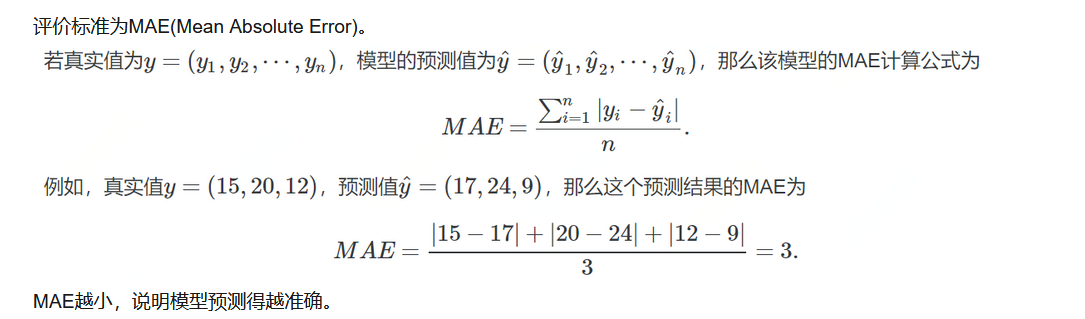

In [5]:
from IPython.display import Image
Image(filename='1699593335185.jpg')

In [2]:
!pip install scikit-learn


In [6]:
# 导入相关库及配置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV # 交叉验证，网格搜索
pd.options.display.max_columns = None # 取消最大列显示限制
warnings.filterwarnings('ignore') # 过滤警告信息，保证清爽输出
%matplotlib inline

In [7]:
df_test = pd.read_csv('used_car_testB_20200421.csv', sep=' ')
df_train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
train = df_train.drop(['SaleID'], axis=1)
test = df_test.drop(['SaleID'], axis=1)

In [8]:
train.head()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [9]:
test.head()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [10]:
# 查看总览 - 训练集
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               150000 non-null  int64  
 1   regDate            150000 non-null  int64  
 2   model              149999 non-null  float64
 3   brand              150000 non-null  int64  
 4   bodyType           145494 non-null  float64
 5   fuelType           141320 non-null  float64
 6   gearbox            144019 non-null  float64
 7   power              150000 non-null  int64  
 8   kilometer          150000 non-null  float64
 9   notRepairedDamage  150000 non-null  object 
 10  regionCode         150000 non-null  int64  
 11  seller             150000 non-null  int64  
 12  offerType          150000 non-null  int64  
 13  creatDate          150000 non-null  int64  
 14  price              150000 non-null  int64  
 15  v_0                150000 non-null  float64
 16  v_

In [11]:
# 转换'-'
train['notRepairedDamage'] = train['notRepairedDamage'].replace('-', np.nan)
test['notRepairedDamage'] = test['notRepairedDamage'].replace('-', np.nan)
# 转换数据类型
train['notRepairedDamage'] = train['notRepairedDamage'].astype('float64')
test['notRepairedDamage'] = test['notRepairedDamage'].astype('float64')
# 检查是否转换成功
train['notRepairedDamage'].unique(), test['notRepairedDamage'].unique()


(array([ 0., nan,  1.]), array([ 0., nan,  1.]))

In [12]:
# 查看数值统计描述 - 训练集
train.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,125676.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,0.113904,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,0.317696,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,0.000000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,0.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,0.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,1.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [13]:
# 查看数值统计描述 - 测试集
test.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,41931.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,0.112256,2581.080680,0.0,0.0,2.016033e+07,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,0.315685,1889.248559,0.0,0.0,1.113395e+02,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.0,2.014031e+07,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,0.000000,1006.000000,0.0,0.0,2.016031e+07,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,0.000000,2204.500000,0.0,0.0,2.016032e+07,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,0.000000,3842.000000,0.0,0.0,2.016033e+07,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,1.000000,8120.000000,0.0,0.0,2.016041e+07,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [14]:
train.drop(['seller'], axis=1, inplace=True)
test.drop(['seller'], axis=1, inplace=True)

In [15]:
train = train.drop(['offerType'], axis=1)
test = test.drop(['offerType'], axis=1)

In [16]:
train.shape, test.shape

((150000, 28), (50000, 27))

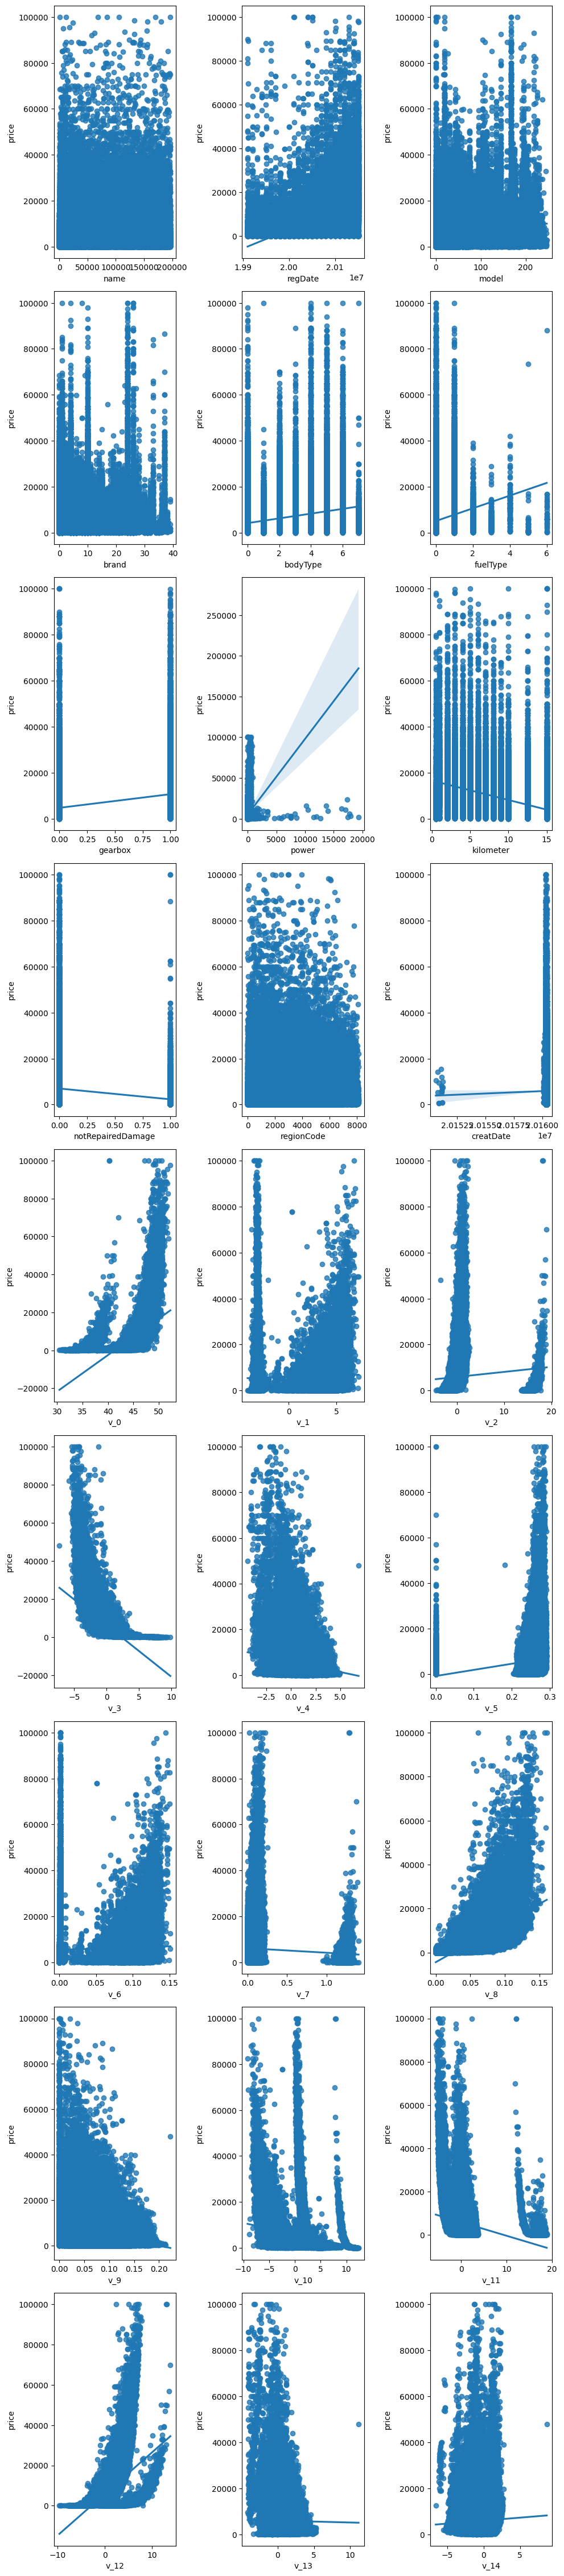

In [17]:
fig = plt.figure(figsize=(10, 50))
for i in range(len(train.columns)-1): # 要减去price列
    fig.add_subplot(10, 3, i+1)
    sns.regplot(x=train.drop(['price'], axis=1).iloc[:, i], y=train['price'])
plt.tight_layout()
plt.show()

In [18]:
train.corr().unstack()['price'].sort_values(ascending=False)

price                1.000000
v_12                 0.692823
v_8                  0.685798
v_0                  0.628397
regDate              0.611959
gearbox              0.329075
bodyType             0.241303
power                0.219834
fuelType             0.200536
v_5                  0.164317
model                0.136983
v_2                  0.085322
v_6                  0.068970
v_1                  0.060914
v_14                 0.035911
regionCode           0.014036
creatDate            0.002955
name                 0.002030
v_13                -0.013993
brand               -0.043799
v_7                 -0.053024
v_4                 -0.147085
notRepairedDamage   -0.190623
v_9                 -0.206205
v_10                -0.246175
v_11                -0.275320
kilometer           -0.440519
v_3                 -0.730946
dtype: float64

In [19]:
train.drop(['v_2', 'v_6', 'v_1', 'v_14', 'v_13', 'v_7', 'name', 'creatDate'], axis=1, inplace=True)
test.drop(['v_2', 'v_6', 'v_1', 'v_14', 'v_13', 'v_7', 'name', 'creatDate'], axis=1, inplace=True)

In [20]:
train.corr().unstack()['price'].sort_values(ascending=False)

price                1.000000
v_12                 0.692823
v_8                  0.685798
v_0                  0.628397
regDate              0.611959
gearbox              0.329075
bodyType             0.241303
power                0.219834
fuelType             0.200536
v_5                  0.164317
model                0.136983
regionCode           0.014036
brand               -0.043799
v_4                 -0.147085
notRepairedDamage   -0.190623
v_9                 -0.206205
v_10                -0.246175
v_11                -0.275320
kilometer           -0.440519
v_3                 -0.730946
dtype: float64

In [21]:
train[train['power'] > 600]['power'].count()

143

In [22]:
test[test['power'] > 600]['power'].count()

51

In [23]:
# 使用map函数，以power列的中位数来替换数值超出范围的power
train['power'] = train['power'].map(lambda x: train['power'].median() if x > 600 else x)
test['power'] = test['power'].map(lambda x: test['power'].median() if x > 600 else x)

<Axes: ylabel='Frequency'>

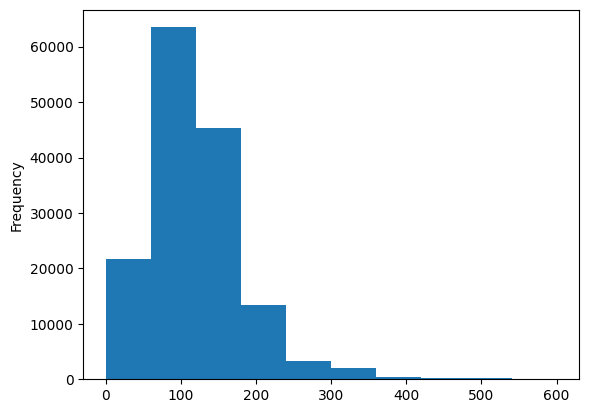

In [24]:
# 检查是否替换成功
train['power'].plot.hist()

<Axes: ylabel='Frequency'>

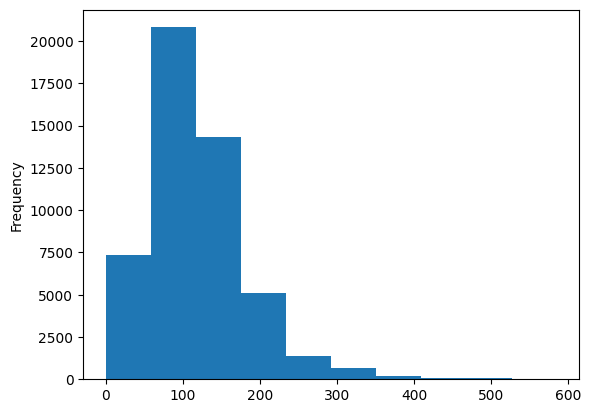

In [25]:
test['power'].plot.hist()

In [26]:
# 查看训练集缺失值存在情况
train.isnull().sum()[train.isnull().sum() > 0]

model                    1
bodyType              4506
fuelType              8680
gearbox               5981
notRepairedDamage    24324
dtype: int64

In [27]:
# 查看测试集缺失值存在情况
test.isnull().sum()[test.isnull().sum() > 0]

bodyType             1504
fuelType             2924
gearbox              1968
notRepairedDamage    8069
dtype: int64

In [28]:
train[train['model'].isnull()]

,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,price,v_0,v_3,v_4,v_5,v_8,v_9,v_10,v_11,v_12
38424,20150809,NaN,37,6.0,1.0,1.0,190.0,2.0,0.0,1425,47950,41.139365,-7.275037,6.829352,0.181562,0.148487,0.222787,1.6757,-3.25056,0.876001


In [29]:
train[(train['brand'] == 37) &
 (train['bodyType'] == 6.0) &
 (train['gearbox'] == 1.0) &
 (train['power'] == 190)]['model'].value_counts()

model
157.0    17
199.0    16
202.0     8
200.0     1
Name: count, dtype: int64

In [30]:
# 用157.0填充缺失值
train.loc[38424, 'model'] = 157.0

In [31]:
train.loc[38424, :]

regDate              2.015081e+07
model                1.570000e+02
brand                3.700000e+01
bodyType             6.000000e+00
fuelType             1.000000e+00
gearbox              1.000000e+00
power                1.900000e+02
kilometer            2.000000e+00
notRepairedDamage    0.000000e+00
regionCode           1.425000e+03
price                4.795000e+04
v_0                  4.113937e+01
v_3                 -7.275037e+00
v_4                  6.829352e+00
v_5                  1.815618e-01
v_8                  1.484868e-01
v_9                  2.227875e-01
v_10                 1.675700e+00
v_11                -3.250560e+00
v_12                 8.760013e-01
Name: 38424, dtype: float64

In [32]:
# 查看填充结果
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regDate            150000 non-null  int64  
 1   model              150000 non-null  float64
 2   brand              150000 non-null  int64  
 3   bodyType           145494 non-null  float64
 4   fuelType           141320 non-null  float64
 5   gearbox            144019 non-null  float64
 6   power              150000 non-null  float64
 7   kilometer          150000 non-null  float64
 8   notRepairedDamage  125676 non-null  float64
 9   regionCode         150000 non-null  int64  
 10  price              150000 non-null  int64  
 11  v_0                150000 non-null  float64
 12  v_3                150000 non-null  float64
 13  v_4                150000 non-null  float64
 14  v_5                150000 non-null  float64
 15  v_8                150000 non-null  float64
 16  v_

In [33]:
# 看缺失值数量
print(train['bodyType'].isnull().value_counts())
print('\n')
print(test['bodyType'].isnull().value_counts())

bodyType
False    145494
True       4506
Name: count, dtype: int64


bodyType
False    48496
True      1504
Name: count, dtype: int64


<Axes: xlabel='bodyType', ylabel='price'>

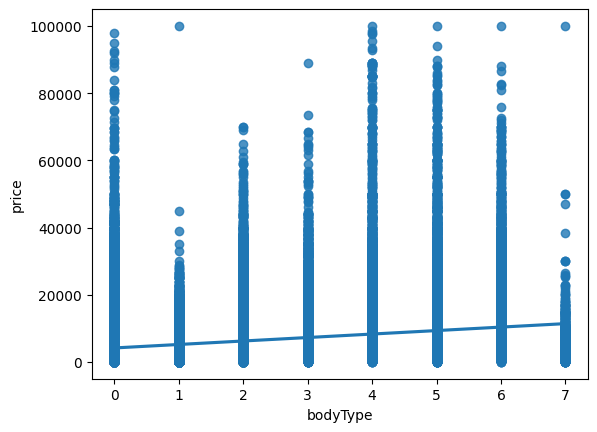

In [34]:
# 输出特征与售价之间的线性关系图（类似散点图）
sns.regplot(x=train['bodyType'], y=train['price'])

In [35]:
# 看看车身类型数量分布
print(train['bodyType'].value_counts())
print('\n')
print(test['bodyType'].value_counts())

bodyType
0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: count, dtype: int64


bodyType
0.0    13765
1.0    11960
2.0     9886
3.0     4491
4.0     3258
5.0     2494
6.0     2212
7.0      430
Name: count, dtype: int64


In [36]:
train.loc[:, 'bodyType'] = train['bodyType'].map(lambda x: 0.0 if pd.isnull(x) else x)
test.loc[:, 'bodyType'] = test['bodyType'].map(lambda x: 0.0 if pd.isnull(x) else x)

In [37]:
print(train['fuelType'].isnull().value_counts())
print('\n')
print(test['fuelType'].isnull().value_counts())

fuelType
False    141320
True       8680
Name: count, dtype: int64


fuelType
False    47076
True      2924
Name: count, dtype: int64


<Axes: xlabel='fuelType', ylabel='price'>

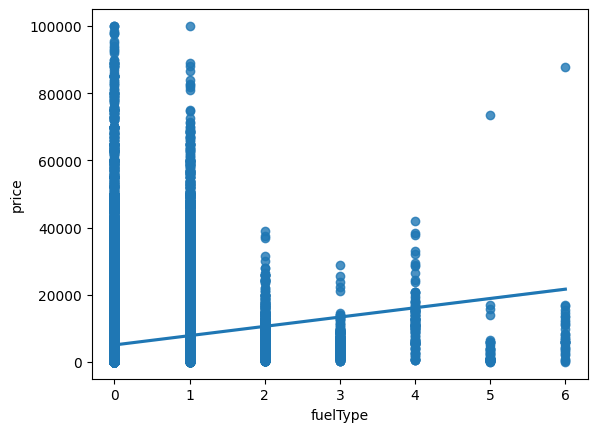

In [ ]:
# 输出特征与售价之间的线性关系图（类似散点图）
sns.regplot(x=train['fuelType'], y=train['price'])

In [38]:
# 猜想：燃油类型与车身类型相关，如豪华轿车更可能是汽油或电动， 而搅拌车大多是柴油
# 创建字典，保存不同bodyType下， fuelType的众数，并以此填充fuelTyp的缺失值
dict_enu_train, dict_enu_test = {}, {}
for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    dict_enu_train[i] = train[train['bodyType'] == i]['fuelType'].mode()[0]
    dict_enu_test[i] = test[test['bodyType'] == i]['fuelType'].mode()[0]
# 发现dict_enu_train, dict_enu_test是一样的内容

In [39]:
dict_index_train, dict_index_test = {}, {}
for bodytype in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    dict_index_train[bodytype] = train[(train['bodyType'] == bodytype) & (train['fuelType'].isnull())].index.tolist()
    dict_index_test[bodytype] = test[(test['bodyType'] == bodytype) & (test['fuelType'].isnull())].index.tolist()

In [40]:
for bt, ft in dict_enu_train.items():
# train.loc[tuple(dict_index[bt]), :]['fuelType'] = ft # 注意：链式索引 (chained indexing)很可能导致赋值失败！
    train.loc[dict_index_train[bt], 'fuelType'] = ft # Pandas推荐使用这种方法来索引/赋值
    test.loc[dict_index_test[bt], 'fuelType'] = ft

In [41]:
# 看缺失值数量
print(train['gearbox'].isnull().value_counts())
print('\n')
print(test['gearbox'].isnull().value_counts())

gearbox
False    144019
True       5981
Name: count, dtype: int64


gearbox
False    48032
True      1968
Name: count, dtype: int64


<Axes: xlabel='gearbox', ylabel='price'>

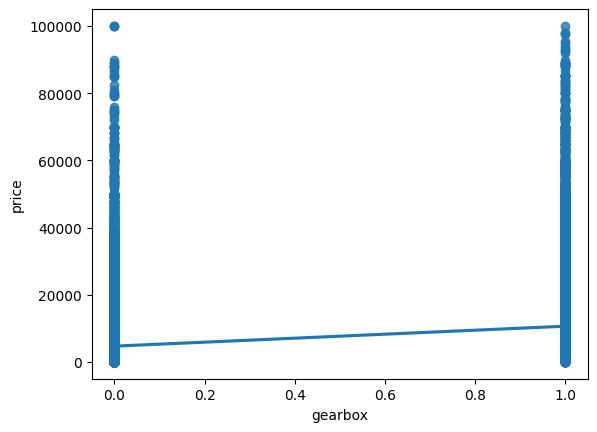

In [ ]:
# 输出特征与售价之间的线性关系图（类似散点图）
sns.regplot(x=train['gearbox'], y=train['price'])

In [42]:
# 看看车身类型数量分布
print(train['gearbox'].value_counts())
print('\n')
print(test['gearbox'].value_counts())

gearbox
0.0    111623
1.0     32396
Name: count, dtype: int64


gearbox
0.0    37131
1.0    10901
Name: count, dtype: int64


In [43]:
train.loc[:, 'gearbox'] = train['gearbox'].map(lambda x: 0.0 if pd.isnull(x) else x)
test.loc[:, 'gearbox'] = test['gearbox'].map(lambda x: 0.0 if pd.isnull(x) else x)

In [44]:
# 看缺失值数量
print(train['notRepairedDamage'].isnull().value_counts())
print('\n')
print(test['notRepairedDamage'].isnull().value_counts())

notRepairedDamage
False    125676
True      24324
Name: count, dtype: int64


notRepairedDamage
False    41931
True      8069
Name: count, dtype: int64


In [45]:
# 查看数量分布
print(train['notRepairedDamage'].value_counts())
print('\n')
print(test['notRepairedDamage'].value_counts())

notRepairedDamage
0.0    111361
1.0     14315
Name: count, dtype: int64


notRepairedDamage
0.0    37224
1.0     4707
Name: count, dtype: int64


In [ ]:
# 查看线性相关系数
train[['notRepairedDamage', 'price']].corr()['price']

notRepairedDamage   -0.190623
price                1.000000
Name: price, dtype: float64

<Axes: xlabel='notRepairedDamage', ylabel='price'>

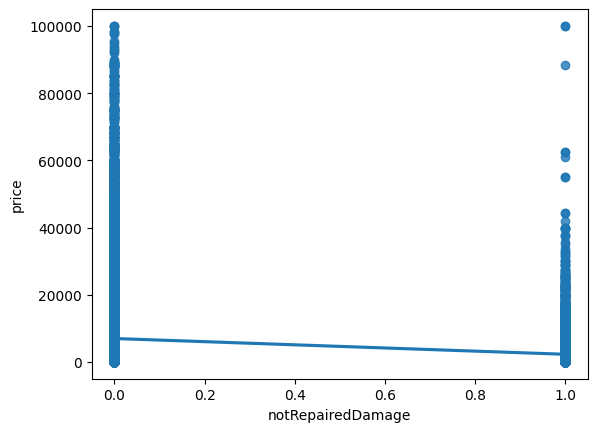

In [ ]:
# 在输出特征与售价之间的线性关系图（类似散点图）
sns.regplot(x=train['notRepairedDamage'], y=train['price'])

In [46]:
train.loc[:, 'notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: 0.0 if pd.isnull(x) else x)
test.loc[:, 'notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: 0.0 if pd.isnull(x) else x)

In [47]:
# 最后。检查填充结果
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regDate            150000 non-null  int64  
 1   model              150000 non-null  float64
 2   brand              150000 non-null  int64  
 3   bodyType           150000 non-null  float64
 4   fuelType           150000 non-null  float64
 5   gearbox            150000 non-null  float64
 6   power              150000 non-null  float64
 7   kilometer          150000 non-null  float64
 8   notRepairedDamage  150000 non-null  float64
 9   regionCode         150000 non-null  int64  
 10  price              150000 non-null  int64  
 11  v_0                150000 non-null  float64
 12  v_3                150000 non-null  float64
 13  v_4                150000 non-null  float64
 14  v_5                150000 non-null  float64
 15  v_8                150000 non-null  float64
 16  v_

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   regDate            50000 non-null  int64  
 1   model              50000 non-null  float64
 2   brand              50000 non-null  int64  
 3   bodyType           50000 non-null  float64
 4   fuelType           50000 non-null  float64
 5   gearbox            50000 non-null  float64
 6   power              50000 non-null  float64
 7   kilometer          50000 non-null  float64
 8   notRepairedDamage  50000 non-null  float64
 9   regionCode         50000 non-null  int64  
 10  v_0                50000 non-null  float64
 11  v_3                50000 non-null  float64
 12  v_4                50000 non-null  float64
 13  v_5                50000 non-null  float64
 14  v_8                50000 non-null  float64
 15  v_9                50000 non-null  float64
 16  v_10               500

In [48]:
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
xgb = XGBRegressor(n_stimators=150, max_depth=8, learning_rate=0.1, random_state=1)
gbdt = GradientBoostingRegressor(subsample=0.8, random_state=1) # subsample小于1可降低方差，但会加大偏差

X = train.drop(['price'], axis=1)
y = train['price']

In [52]:
#随机森林
score_rf = -1 * cross_val_score(rf,
                           X,
                           y,
                           scoring='neg_mean_absolute_error',
                           cv=5).mean() # 取得分均值
print('随机森林模型的平均MAE为：', score_rf)
# XGBoost
score_xgb = -1 * cross_val_score(xgb,
                                X,
                                y,
                                scoring='neg_mean_absolute_error',
                                cv=5).mean() # 取得分均值
print('XGBoost模型的平均MAE为：', score_xgb)
# 梯度提升树GBDT
score_gbdt = -1 * cross_val_score(gbdt,
                                 X,
                                 y,
                                 scoring='neg_mean_absolute_error',
                                 cv=5).mean() # 取得分均值
print('梯度提升树模型的平均MAE为：', score_gbdt)

随机森林模型的平均MAE为： 924.4271451346958
XGBoost模型的平均MAE为： 619.4995433648594
梯度提升树模型的平均MAE为： 894.0445919961874


In [50]:
params = {'n_estimators': [150, 200, 250],
           'learning_rate': [0.1],
           'subsample': [0.5, 0.8]}
model = GridSearchCV(estimator=xgb,
                    param_grid=params,
                    scoring='neg_mean_absolute_error',
                    cv=3)
model.fit(X, y)
# 输出最佳参数
print('最佳参数为：\n', model.best_params_)
print('最佳分数为：\n', model.best_score_)
print('最佳模型为：\n', model.best_estimator_)

最佳参数为：
 {'learning_rate': 0.1, 'n_estimators': 250, 'subsample': 0.8}
最佳分数为：
 -585.0131849984137
最佳模型为：
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             n_stimators=150, num_parallel_tree=None, ...)


In [51]:
predictions = model.predict(test)
result = pd.DataFrame({'SaleID': df_test['SaleID'], 'price': predictions})
result.to_csv('My_submission.csv', index=False)